In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing kaggle data set


In [6]:
#kaggle api
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls
#to list out the directories

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3583.jpg', 'with_mask_724.jpg', 'with_mask_112.jpg', 'with_mask_1678.jpg', 'with_mask_3502.jpg']
['with_mask_1088.jpg', 'with_mask_2781.jpg', 'with_mask_519.jpg', 'with_mask_580.jpg', 'with_mask_2600.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1457.jpg', 'without_mask_3644.jpg', 'without_mask_116.jpg', 'without_mask_3362.jpg', 'without_mask_694.jpg']
['without_mask_1673.jpg', 'without_mask_3128.jpg', 'without_mask_3144.jpg', 'without_mask_2854.jpg', 'without_mask_2840.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for two class of Images**


with mask--> 1
without mask-->0

In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

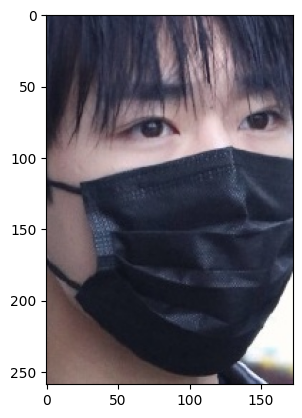

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1540.jpg')
imgplot = plt.imshow(img)
plt.show()

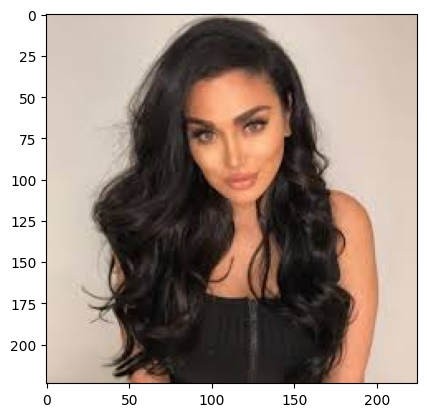

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2920.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images
2. Convert the images into  

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
#why forward slash at end?

data = []

for img_file in with_mask_files: #name of file

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[ 89,  76,  68],
        [102,  89,  80],
        [116, 101,  91],
        ...,
        [111, 115, 114],
        [112, 116, 115],
        [113, 117, 116]],

       [[ 90,  77,  69],
        [102,  88,  80],
        [115, 100,  90],
        ...,
        [110, 114, 113],
        [112, 115, 115],
        [113, 116, 115]],

       [[ 91,  78,  69],
        [102,  88,  80],
        [114,  98,  89],
        ...,
        [107, 112, 111],
        [109, 114, 113],
        [111, 116, 114]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
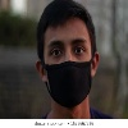

In [24]:
data[0]

In [46]:
type(data[0])
#first Image

numpy.ndarray

In [47]:
data[0].shape
#3- color channel(RGB), if grey scale- 1

(128, 128, 3)

In [48]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [49]:
type(x)

numpy.ndarray

In [50]:
type(y)

numpy.ndarray

In [55]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [51]:
print(len(x))
print(len(y))

7553
7553


In [52]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test split**

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
print(x.shape,x_test.shape,x_train.shape)

(7553, 128, 128, 3) (1511, 128, 128, 3) (6042, 128, 128, 3)


In [54]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

array([[[228, 214, 186],
        [228, 214, 186],
        [228, 215, 187],
        ...,
        [122, 128, 104],
        [122, 128, 104],
        [122, 128, 104]],

       [[235, 224, 202],
        [235, 225, 202],
        [236, 225, 202],
        ...,
        [185, 183, 155],
        [186, 183, 155],
        [186, 183, 155]],

       [[209, 203, 190],
        [212, 206, 194],
        [219, 212, 199],
        ...,
        [226, 216, 187],
        [226, 216, 187],
        [226, 216, 187]],

       ...,

       [[ 43,  44,  61],
        [ 43,  44,  61],
        [ 43,  43,  61],
        ...,
        [ 42,  42,  52],
        [ 43,  43,  53],
        [ 46,  46,  56]],

       [[ 45,  46,  64],
        [ 45,  46,  64],
        [ 44,  45,  63],
        ...,
        [ 39,  39,  49],
        [ 41,  41,  51],
        [ 44,  44,  54]],

       [[ 47,  48,  66],
        [ 46,  47,  65],
        [ 46,  47,  66],
        ...,
        [ 41,  41,  51],
        [ 43,  43,  53],
        [ 45,  45,  55]]], dtype=uint8)
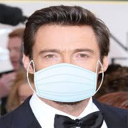

In [37]:
x_train[0]

In [38]:
x_train_scaled[0]

array([[[0.89411765, 0.83921569, 0.72941176],
        [0.89411765, 0.83921569, 0.72941176],
        [0.89411765, 0.84313725, 0.73333333],
        ...,
        [0.47843137, 0.50196078, 0.40784314],
        [0.47843137, 0.50196078, 0.40784314],
        [0.47843137, 0.50196078, 0.40784314]],

       [[0.92156863, 0.87843137, 0.79215686],
        [0.92156863, 0.88235294, 0.79215686],
        [0.9254902 , 0.88235294, 0.79215686],
        ...,
        [0.7254902 , 0.71764706, 0.60784314],
        [0.72941176, 0.71764706, 0.60784314],
        [0.72941176, 0.71764706, 0.60784314]],

       [[0.81960784, 0.79607843, 0.74509804],
        [0.83137255, 0.80784314, 0.76078431],
        [0.85882353, 0.83137255, 0.78039216],
        ...,
        [0.88627451, 0.84705882, 0.73333333],
        [0.88627451, 0.84705882, 0.73333333],
        [0.88627451, 0.84705882, 0.73333333]],

       ...,

       [[0.16862745, 0.17254902, 0.23921569],
        [0.16862745, 0.17254902, 0.23921569],
        [0.16862745, 0

**Building a Convolutional Neural Network(CNN)**

In [39]:
import tensorflow as tf
from tensorflow import keras

In [56]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
#no.of neurons=no.of classes
#set up artichect layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [59]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - acc: 0.6739 - loss: 0.7148 - val_acc: 0.9025 - val_loss: 0.2598
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8852 - loss: 0.2981 - val_acc: 0.9207 - val_loss: 0.2164
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9154 - loss: 0.2295 - val_acc: 0.9174 - val_loss: 0.1885
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9254 - loss: 0.1954 - val_acc: 0.9091 - val_loss: 0.2175
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9344 - loss: 0.1628 - val_acc: 0.9322 - val_loss: 0.1695


**Model Evaluation**

In [43]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9111 - loss: 0.3477
Test Accuracy = 0.9159497022628784


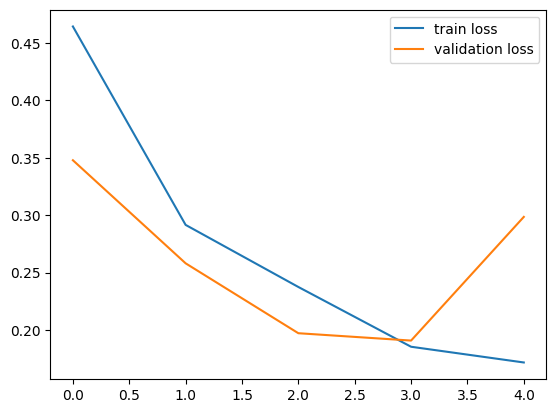

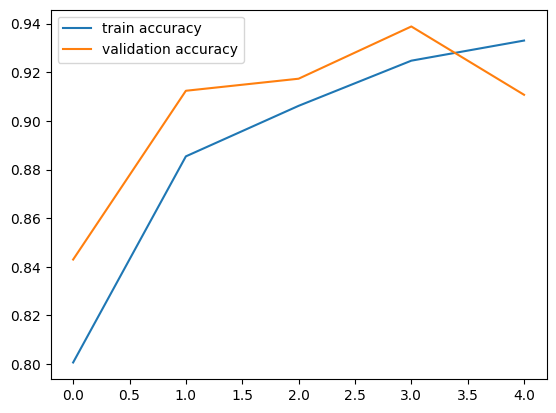

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test_mask-3.jpg


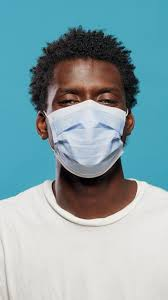

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.07382467 0.8123943 ]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test_mask-3.jpg


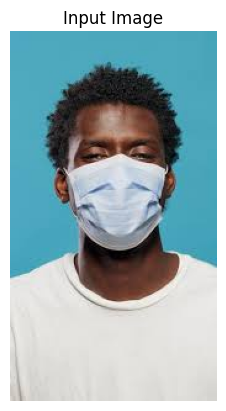

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction: [[0.07382467 0.8123943 ]]
Predicted label: 1
🟢 The person is wearing a mask


In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Show input image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis(False)
plt.show()

# Resize and preprocess
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

# Predict
input_prediction = model.predict(input_image_reshaped)
print("Raw prediction:", input_prediction)

# Detect model type
if input_prediction.shape[-1] == 1:
    # Binary classification using sigmoid
    input_pred_label = int(input_prediction[0][0] > 0.5)
else:
    # Multi-class (2 class softmax)
    input_pred_label = np.argmax(input_prediction)

print("Predicted label:", input_pred_label)

# Display result
if input_pred_label == 1:
    print("🟢 The person is wearing a mask")
else:
    print("🔴 The person is NOT wearing a mask")


Enter path of the image: /content/test_mask-1.jpg


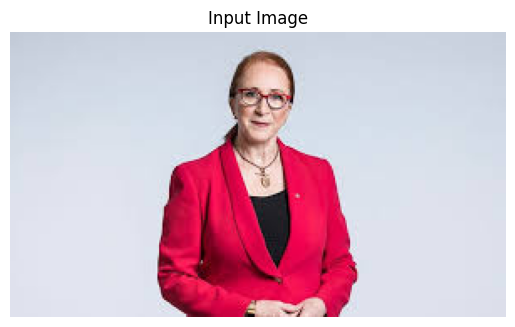

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw prediction: [[0.00253162 0.958854  ]]
Predicted label: 1
🟢 The person is wearing a mask


In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Provide full path here or upload using file upload tool
input_image_path = input("Enter path of the image: ")

# Read the image
input_image = cv2.imread(input_image_path)

# Error check
if input_image is None:
    raise ValueError(f"Could not read image at path: {input_image_path}")

# Display the image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')
plt.show()

# Resize and normalize
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

# Predict
input_prediction = model.predict(input_image_reshaped)
print("Raw prediction:", input_prediction)

# Decide label based on output shape
if input_prediction.shape[-1] == 1:
    # Binary classification (sigmoid)
    pred_prob = input_prediction[0][0]
    input_pred_label = int(pred_prob > 0.5)
else:
    # Multiclass classification (softmax)
    input_pred_label = np.argmax(input_prediction[0])

print("Predicted label:", input_pred_label)

# Result
if input_pred_label == 1:
    print("🟢 The person is wearing a mask")
else:
    print("🔴 The person is NOT wearing a mask")
